In [1]:
%run data_loader.ipynb
%run model.ipynb

In [2]:
model = model_ex2
model.to(device)

test_dataset = RadarDataset(data_transform, './data/images_test/')
test_data_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, collate_fn=collate_fn)
model.eval()

NewModel(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(in

In [3]:
total_AP = []
sunny_AP = []
fog_AP = []
rain_AP = []
night_AP = []

for i in range(15):
    model.load_state_dict(torch.load('./model/ex2_'+str(i+1)+'.pt'))

    # Total AP Caculation
    labels = []
    preds_adj_all = []
    annot_all = []
    for weather, im, annot in tqdm(test_data_loader, position = 0, leave = True):
        im = list(img.to(device) for img in im)
        for t in annot:
            labels += t['labels']
        with torch.no_grad():
            preds_adj = make_prediction(model, im, 0.5)
            preds_adj = [{k: v.to(torch.device('cpu')) for k, v in t.items()} for t in preds_adj]
            preds_adj_all.append(preds_adj)
            annot_all.append(annot)
    sample_metrics = []
    for batch_i in range(len(preds_adj_all)):
        sample_metrics += get_batch_statistics(preds_adj_all[batch_i], annot_all[batch_i], iou_threshold=0.5) 
    true_positives, pred_scores, pred_labels = [torch.cat(x, 0) for x in list(zip(*sample_metrics))]
    precision, recall, AP, f1, ap_class = ap_per_class(true_positives, pred_scores, pred_labels, torch.tensor(labels))
    mAP_total = torch.mean(AP)
    total_AP.append(mAP_total.item())
    print(f'Total AP : {mAP_total}'+'_'+str(i+1))
    
    # Sunny AP Caculation
    labels = []
    preds_adj_all = []
    annot_all = []
    for weather, im, annot in tqdm(test_data_loader, position = 0, leave = True):
        if weather[0] == 'sunny':
            im = list(img.to(device) for img in im)
            for t in annot:
                labels += t['labels']
            with torch.no_grad():
                preds_adj = make_prediction(model, im, 0.5)
                preds_adj = [{k: v.to(torch.device('cpu')) for k, v in t.items()} for t in preds_adj]
                preds_adj_all.append(preds_adj)
                annot_all.append(annot)
        else:
            pass
    sample_metrics = []
    for batch_i in range(len(preds_adj_all)):
        sample_metrics += get_batch_statistics(preds_adj_all[batch_i], annot_all[batch_i], iou_threshold=0.5) 
    true_positives, pred_scores, pred_labels = [torch.cat(x, 0) for x in list(zip(*sample_metrics))]
    precision, recall, AP, f1, ap_class = ap_per_class(true_positives, pred_scores, pred_labels, torch.tensor(labels))
    mAP_sunny = torch.mean(AP)
    sunny_AP.append(mAP_sunny.item())
    print(f'Sunny AP : {mAP_sunny}'+'_'+str(i+1))
    
    # Rain AP Caculation
    labels = []
    preds_adj_all = []
    annot_all = []
    for weather, im, annot in tqdm(test_data_loader, position = 0, leave = True):
        if weather[0] == 'rain':
            im = list(img.to(device) for img in im)
            for t in annot:
                labels += t['labels']
            with torch.no_grad():
                preds_adj = make_prediction(model, im, 0.5)
                preds_adj = [{k: v.to(torch.device('cpu')) for k, v in t.items()} for t in preds_adj]
                preds_adj_all.append(preds_adj)
                annot_all.append(annot)
        else:
            pass
    sample_metrics = []
    for batch_i in range(len(preds_adj_all)):
        sample_metrics += get_batch_statistics(preds_adj_all[batch_i], annot_all[batch_i], iou_threshold=0.5) 
    true_positives, pred_scores, pred_labels = [torch.cat(x, 0) for x in list(zip(*sample_metrics))]
    precision, recall, AP, f1, ap_class = ap_per_class(true_positives, pred_scores, pred_labels, torch.tensor(labels))
    mAP_rain = torch.mean(AP)
    rain_AP.append(mAP_rain.item())
    print(f'Rain AP : {mAP_rain}'+'_'+str(i+1))

    # Fog AP Caculation
    labels = []
    preds_adj_all = []
    annot_all = []
    for weather, im, annot in tqdm(test_data_loader, position = 0, leave = True):
        if weather[0] == 'fog':
            im = list(img.to(device) for img in im)
            for t in annot:
                labels += t['labels']
            with torch.no_grad():
                preds_adj = make_prediction(model, im, 0.5)
                preds_adj = [{k: v.to(torch.device('cpu')) for k, v in t.items()} for t in preds_adj]
                preds_adj_all.append(preds_adj)
                annot_all.append(annot)
        else:
            pass
    sample_metrics = []
    for batch_i in range(len(preds_adj_all)):
        sample_metrics += get_batch_statistics(preds_adj_all[batch_i], annot_all[batch_i], iou_threshold=0.5) 
    true_positives, pred_scores, pred_labels = [torch.cat(x, 0) for x in list(zip(*sample_metrics))]
    precision, recall, AP, f1, ap_class = ap_per_class(true_positives, pred_scores, pred_labels, torch.tensor(labels))
    mAP_fog = torch.mean(AP)
    fog_AP.append(mAP_fog.item())
    print(f'Fog AP : {mAP_fog}'+'_'+str(i+1))

    # Night AP Caculation
    labels = []
    preds_adj_all = []
    annot_all = []
    for weather, im, annot in tqdm(test_data_loader, position = 0, leave = True):
        if weather[0] == 'night':
            im = list(img.to(device) for img in im)
            for t in annot:
                labels += t['labels']
            with torch.no_grad():
                preds_adj = make_prediction(model, im, 0.5)
                preds_adj = [{k: v.to(torch.device('cpu')) for k, v in t.items()} for t in preds_adj]
                preds_adj_all.append(preds_adj)
                annot_all.append(annot)
        else:
            pass
    sample_metrics = []
    for batch_i in range(len(preds_adj_all)):
        sample_metrics += get_batch_statistics(preds_adj_all[batch_i], annot_all[batch_i], iou_threshold=0.5) 
    true_positives, pred_scores, pred_labels = [torch.cat(x, 0) for x in list(zip(*sample_metrics))]
    precision, recall, AP, f1, ap_class = ap_per_class(true_positives, pred_scores, pred_labels, torch.tensor(labels))
    mAP_night = torch.mean(AP)
    night_AP.append(mAP_night.item())
    print(f'Night AP : {mAP_night}'+'_'+str(i+1))

100%|█████████████████████████████████████████| 749/749 [01:19<00:00,  9.40it/s]


Total AP : 0.9451012829956209_1


100%|█████████████████████████████████████████| 749/749 [00:38<00:00, 19.66it/s]


Sunny AP : 0.9558402341920988_1


100%|█████████████████████████████████████████| 749/749 [00:37<00:00, 19.94it/s]


Rain AP : 0.9510274084320898_1


100%|█████████████████████████████████████████| 749/749 [00:12<00:00, 60.44it/s]


Fog AP : 0.47142857483455103_1


100%|█████████████████████████████████████████| 749/749 [00:25<00:00, 29.05it/s]


Night AP : 0.8770856449117819_1


100%|█████████████████████████████████████████| 749/749 [01:20<00:00,  9.33it/s]


Total AP : 0.9270665083265577_2


100%|█████████████████████████████████████████| 749/749 [00:39<00:00, 19.02it/s]


Sunny AP : 0.9686568070446668_2


100%|█████████████████████████████████████████| 749/749 [00:38<00:00, 19.47it/s]


Rain AP : 0.9103512438202088_2


100%|█████████████████████████████████████████| 749/749 [00:12<00:00, 57.71it/s]


Fog AP : 0.5202564345873322_2


100%|█████████████████████████████████████████| 749/749 [00:26<00:00, 28.42it/s]


Night AP : 0.8882868405583917_2


100%|█████████████████████████████████████████| 749/749 [01:21<00:00,  9.19it/s]


Total AP : 0.9563216200232318_3


100%|█████████████████████████████████████████| 749/749 [00:40<00:00, 18.71it/s]


Sunny AP : 0.9601673897872587_3


100%|█████████████████████████████████████████| 749/749 [00:38<00:00, 19.21it/s]


Rain AP : 0.9653051549727181_3


100%|█████████████████████████████████████████| 749/749 [00:13<00:00, 57.12it/s]


Fog AP : 0.5561904843932108_3


100%|█████████████████████████████████████████| 749/749 [00:26<00:00, 28.07it/s]


Night AP : 0.8912718016795154_3


100%|█████████████████████████████████████████| 749/749 [01:21<00:00,  9.20it/s]


Total AP : 0.9571637611491575_4


100%|█████████████████████████████████████████| 749/749 [00:39<00:00, 18.73it/s]


Sunny AP : 0.975037402259737_4


100%|█████████████████████████████████████████| 749/749 [00:38<00:00, 19.22it/s]


Rain AP : 0.9612392175546027_4


100%|█████████████████████████████████████████| 749/749 [00:12<00:00, 58.58it/s]


Fog AP : 0.6555555489328171_4


100%|█████████████████████████████████████████| 749/749 [00:26<00:00, 28.55it/s]


Night AP : 0.8855660293461796_4


100%|█████████████████████████████████████████| 749/749 [01:21<00:00,  9.24it/s]


Total AP : 0.9546541621076905_5


100%|█████████████████████████████████████████| 749/749 [00:39<00:00, 18.88it/s]


Sunny AP : 0.9723356533574758_5


100%|█████████████████████████████████████████| 749/749 [00:38<00:00, 19.21it/s]


Rain AP : 0.962336842655386_5


100%|█████████████████████████████████████████| 749/749 [00:12<00:00, 58.26it/s]


Fog AP : 0.5799999949336057_5


100%|█████████████████████████████████████████| 749/749 [00:26<00:00, 28.27it/s]


Night AP : 0.8665903038401659_5


100%|█████████████████████████████████████████| 749/749 [01:21<00:00,  9.22it/s]


Total AP : 0.9557369128169597_6


100%|█████████████████████████████████████████| 749/749 [00:40<00:00, 18.63it/s]


Sunny AP : 0.9713921052021561_6


100%|█████████████████████████████████████████| 749/749 [00:39<00:00, 19.01it/s]


Rain AP : 0.9623922051709783_6


100%|█████████████████████████████████████████| 749/749 [00:13<00:00, 57.45it/s]


Fog AP : 0.45000000298023224_6


100%|█████████████████████████████████████████| 749/749 [00:26<00:00, 27.76it/s]


Night AP : 0.8821801848979938_6


100%|█████████████████████████████████████████| 749/749 [01:22<00:00,  9.13it/s]


Total AP : 0.9644701034766001_7


100%|█████████████████████████████████████████| 749/749 [00:40<00:00, 18.65it/s]


Sunny AP : 0.9805771069752751_7


100%|█████████████████████████████████████████| 749/749 [00:39<00:00, 19.05it/s]


Rain AP : 0.965264691616305_7


100%|█████████████████████████████████████████| 749/749 [00:13<00:00, 57.07it/s]


Fog AP : 0.44785715577857843_7


100%|█████████████████████████████████████████| 749/749 [00:26<00:00, 28.04it/s]


Night AP : 0.9130078690365622_7


100%|█████████████████████████████████████████| 749/749 [01:22<00:00,  9.10it/s]


Total AP : 0.9551733987181521_8


100%|█████████████████████████████████████████| 749/749 [00:40<00:00, 18.52it/s]


Sunny AP : 0.9658814797944899_8


100%|█████████████████████████████████████████| 749/749 [00:39<00:00, 19.02it/s]


Rain AP : 0.9636037571926046_8


100%|█████████████████████████████████████████| 749/749 [00:13<00:00, 57.60it/s]


Fog AP : 0.699999988079071_8


100%|█████████████████████████████████████████| 749/749 [00:26<00:00, 28.09it/s]


Night AP : 0.8870740367495689_8


100%|█████████████████████████████████████████| 749/749 [01:22<00:00,  9.11it/s]


Total AP : 0.958678936310335_9


100%|█████████████████████████████████████████| 749/749 [00:40<00:00, 18.45it/s]


Sunny AP : 0.9801787908672956_9


100%|█████████████████████████████████████████| 749/749 [00:39<00:00, 19.13it/s]


Rain AP : 0.9590172181279684_9


100%|█████████████████████████████████████████| 749/749 [00:13<00:00, 57.37it/s]


Fog AP : 0.6283333239952729_9


100%|█████████████████████████████████████████| 749/749 [00:26<00:00, 27.96it/s]


Night AP : 0.8972599419503204_9


100%|█████████████████████████████████████████| 749/749 [01:21<00:00,  9.17it/s]


Total AP : 0.9554817093598409_10


100%|█████████████████████████████████████████| 749/749 [00:40<00:00, 18.65it/s]


Sunny AP : 0.9752856260534202_10


100%|█████████████████████████████████████████| 749/749 [00:38<00:00, 19.21it/s]


Rain AP : 0.9608386536847462_10


100%|█████████████████████████████████████████| 749/749 [00:13<00:00, 57.05it/s]


Fog AP : 0.6000000238418579_10


100%|█████████████████████████████████████████| 749/749 [00:26<00:00, 28.19it/s]


Night AP : 0.8770439113698991_10


100%|█████████████████████████████████████████| 749/749 [01:21<00:00,  9.15it/s]


Total AP : 0.9561318014743474_11


100%|█████████████████████████████████████████| 749/749 [00:40<00:00, 18.71it/s]


Sunny AP : 0.9699752029996027_11


100%|█████████████████████████████████████████| 749/749 [00:39<00:00, 19.19it/s]


Rain AP : 0.9650343300004245_11


100%|█████████████████████████████████████████| 749/749 [00:13<00:00, 57.35it/s]


Fog AP : 0.4114285775167601_11


100%|█████████████████████████████████████████| 749/749 [00:26<00:00, 27.97it/s]


Night AP : 0.8764502001646228_11


100%|█████████████████████████████████████████| 749/749 [01:21<00:00,  9.15it/s]


Total AP : 0.9565110202474578_12


100%|█████████████████████████████████████████| 749/749 [00:39<00:00, 18.75it/s]


Sunny AP : 0.9688931040901032_12


100%|█████████████████████████████████████████| 749/749 [00:39<00:00, 19.06it/s]


Rain AP : 0.9617986650066719_12


100%|█████████████████████████████████████████| 749/749 [00:13<00:00, 57.34it/s]


Fog AP : 0.5750000178813934_12


100%|█████████████████████████████████████████| 749/749 [00:26<00:00, 27.93it/s]


Night AP : 0.8971744475113503_12


100%|█████████████████████████████████████████| 749/749 [01:21<00:00,  9.14it/s]


Total AP : 0.9571774662290622_13


100%|█████████████████████████████████████████| 749/749 [00:40<00:00, 18.52it/s]


Sunny AP : 0.9694006054026225_13


100%|█████████████████████████████████████████| 749/749 [00:39<00:00, 18.94it/s]


Rain AP : 0.9640702904491789_13


100%|█████████████████████████████████████████| 749/749 [00:13<00:00, 57.51it/s]


Fog AP : 0.5666666845480606_13


100%|█████████████████████████████████████████| 749/749 [00:26<00:00, 28.45it/s]


Night AP : 0.8905891847116045_13


100%|█████████████████████████████████████████| 749/749 [01:21<00:00,  9.16it/s]


Total AP : 0.9575894620874017_14


100%|█████████████████████████████████████████| 749/749 [00:40<00:00, 18.67it/s]


Sunny AP : 0.9747012432764457_14


100%|█████████████████████████████████████████| 749/749 [00:39<00:00, 19.05it/s]


Rain AP : 0.9623968221509216_14


100%|█████████████████████████████████████████| 749/749 [00:12<00:00, 58.01it/s]


Fog AP : 0.5_14


100%|█████████████████████████████████████████| 749/749 [00:26<00:00, 28.31it/s]


Night AP : 0.8890432682150013_14


100%|█████████████████████████████████████████| 749/749 [01:21<00:00,  9.14it/s]


Total AP : 0.9557554719672687_15


100%|█████████████████████████████████████████| 749/749 [00:39<00:00, 18.73it/s]


Sunny AP : 0.962393496026781_15


100%|█████████████████████████████████████████| 749/749 [00:39<00:00, 19.09it/s]


Rain AP : 0.966620738818424_15


100%|█████████████████████████████████████████| 749/749 [00:13<00:00, 55.69it/s]


Fog AP : 0.5_15


100%|█████████████████████████████████████████| 749/749 [00:26<00:00, 28.49it/s]


Night AP : 0.8858169708354353_15


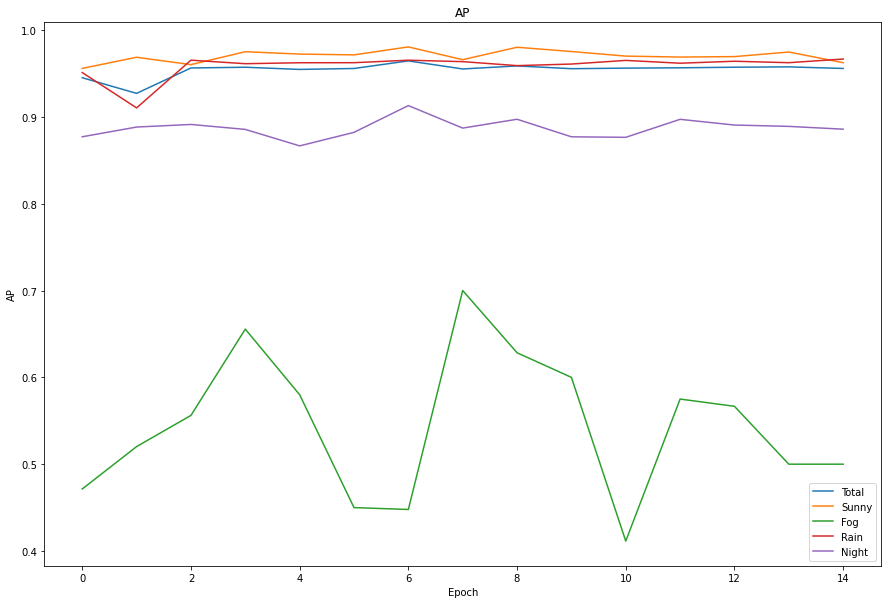

In [4]:
# Test result

y1 = total_AP
y2 = sunny_AP
y3 = fog_AP
y4 = rain_AP
y5 = night_AP
x = list(range(0,len(y1)))

plt.figure(figsize=(15,10))
plt.plot(x, y1, label = "Total")
plt.plot(x, y2, label = "Sunny")
plt.plot(x, y3, label = "Fog")
plt.plot(x, y4, label = "Rain")
plt.plot(x, y5, label = "Night")
plt.xlabel('Epoch')
plt.ylabel('AP')
plt.title('AP')
plt.legend()
plt.show()

In [5]:
(m,i) = max((v,i) for i,v in enumerate(total_AP))
print (m,i)

(m,i) = max((v,i) for i,v in enumerate(sunny_AP))
print (m,i)

(m,i) = max((v,i) for i,v in enumerate(fog_AP))
print (m,i)

(m,i) = max((v,i) for i,v in enumerate(rain_AP))
print (m,i)

(m,i) = max((v,i) for i,v in enumerate(night_AP))
print (m,i)

0.9644701034766001 6
0.9805771069752751 6
0.699999988079071 7
0.966620738818424 14
0.9130078690365622 6


In [6]:
print(y2) #sunny
print(y3) #fog
print(y4) #rain
print(y5) #night

[0.9558402341920988, 0.9686568070446668, 0.9601673897872587, 0.975037402259737, 0.9723356533574758, 0.9713921052021561, 0.9805771069752751, 0.9658814797944899, 0.9801787908672956, 0.9752856260534202, 0.9699752029996027, 0.9688931040901032, 0.9694006054026225, 0.9747012432764457, 0.962393496026781]
[0.47142857483455103, 0.5202564345873322, 0.5561904843932108, 0.6555555489328171, 0.5799999949336057, 0.45000000298023224, 0.44785715577857843, 0.699999988079071, 0.6283333239952729, 0.6000000238418579, 0.4114285775167601, 0.5750000178813934, 0.5666666845480606, 0.5, 0.5]
[0.9510274084320898, 0.9103512438202088, 0.9653051549727181, 0.9612392175546027, 0.962336842655386, 0.9623922051709783, 0.965264691616305, 0.9636037571926046, 0.9590172181279684, 0.9608386536847462, 0.9650343300004245, 0.9617986650066719, 0.9640702904491789, 0.9623968221509216, 0.966620738818424]
[0.8770856449117819, 0.8882868405583917, 0.8912718016795154, 0.8855660293461796, 0.8665903038401659, 0.8821801848979938, 0.9130078